# Logistic Regression with PyTorch
----------------

Last chapter, we covered logistic regression and its loss function (i.e., BCE). We were able to implement it using NumPy, and we also covered some tricks along the way. In this chapter, we'll be covering logistic regression again, but this time, in PyTorch.

We're going to start by importing the same libraries as before, except this time, we won't be importing NumPy, we'll be importing PyTorch instead.

In [1]:
import torch
import matplotlib.pyplot as plt
from IPython import display
import time

Now that we imported the required libraries, let's make the same dataset which we constructed at the start of chapter 2, but this time, in PyTorch.

In [2]:
X = torch.cat((torch.arange(15, dtype=float), torch.arange(20, 35, dtype=float)), axis=0)
y = torch.cat((torch.zeros(15, dtype=float), torch.ones(15, dtype=float)), axis=0)

Those 2 lines above look almost identical to the NumPy lines. We essentially replaced "np" with "torch" and voila, we're using PyTorch instead. 

Let's print out the content of the variables and look inside.

In [3]:
print('X')
print(X)
print('y')
print(y)

X
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
        33., 34.], dtype=torch.float64)
y
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)


In NumPy, if you remember the types of our variables, you’d remember that they were arrays. As for with PyTorch, we're seeing something by the name of "tensor". What's that? I'll explain. In Python, natively, arrays don't actually exist. There are lists, but no arrays. NumPy was able to change that and introduce arrays to Python. The datasets we created in chapters 1 and 2 were actually NumPy arrays. PyTorch doesn't have arrays, rather, it has tensors. Technically speaking, tensors and arrays are not 1 of the same, but in practice, we use tensors exactly the same way we would use arrays. That means, in practice, a 1D array is the same as a tensor of rank 1, a 2D array is the same as a tensor of rank 2, and so on.

## 3.1 No More NumPy!

Let's continue rewriting our code from chapter 2, but using PyTorch instead.

In [4]:
def BCE(y, y_pred): ##log loss error (binary cross entropy)
  return -torch.sum((y*torch.log(y_pred) + (1-y)*torch.log(1-y_pred)))/y.shape[0]

We just had the loss function coded in PyTorch. Again, same thing as NumPy, minus, we replaced "np" with "torch".

You're going to see the same below for the rest of the code for logistic regression.

<Figure size 432x288 with 0 Axes>

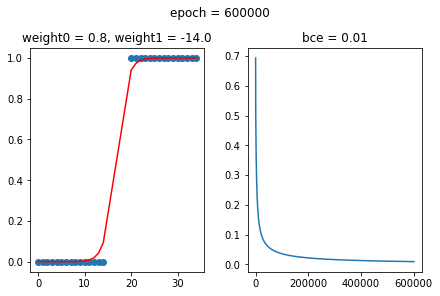

In [5]:
epoch_loss = []

weights = torch.tensor([0., 0.])
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(600000+1): 
    linear = weights[0]*X + weights[1]
    y_pred = 1/(1+torch.exp(-linear))
    loss = BCE(y, y_pred)
    epoch_loss.append(loss)


    if(epoch%50000 == 0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred, 'r')
        ax0.set_title('weight0 = {0:.1f}, weight1 = {1:.1f}'.format(weights[0], weights[1]))
        ax1.set_title('bce = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################
    
    ###simplified slope and bias derivatives with respect to loss###  
    D_mse_wrt_slope = torch.sum(X * (y - y_pred))
    D_mse_wrt_bias = torch.sum(y - y_pred)
    ###########

    weights[0] += learning_rate * D_mse_wrt_slope
    weights[1] += learning_rate * D_mse_wrt_bias

Looks almost identical to chapter 2. Same results, same learning rate, same number of epochs, but in PyTorch. Having said that, there is 1 difference in the code. Instead of having the variables "slope" and "bias", I replaced them both with 1 tensor which holds 2 values. My 0th (zero-ith) value of the tensor is synonymous with the slope and my 1st value of the tensor is synonymous with the bias.

Logistic regression in PyTorch. That was easy. There's 1 more part to this chapter and we're done!

## 3.2 Autograd in PyTorch

You must be thinking, "we're almost through the chapter, but he still hasn't gone over why we switched from NumPy to PyTorch." I started the book with NumPy so that you can get a feel of it, considering it's 1 of the most popular data science libraries in Python. Did I have to start with NumPy? No. The reason I started with it is because NumPy is more popular than PyTorch. The reason for that is because people are just too intimidated to jump into deep learning. My point in starting with NumPy was to show that, things may seem scary, until you make the jump and realize it's not that bad.

NumPy and PyTorch are similar in many ways, including a lot of their functions (which we've seen above), but there are 2 things which make PyTorch fundamentally different. The first is that, with PyTorch, we no longer have to calculate the derivatives. Absolutely no calculus required. PyTorch takes care of all of it. Instead of derivatives, they're known as gradients, but that's just a subtlety. The second fundamental difference is that matrix calculations are able to be performed on the GPU. Why is that important? Remember in chapter 1 how we got rid of the loops and NumPy did all the calculations in 1 line? We were able to perform the calculations all together in 1 line, but on the CPU, the calculations were being done 1 at a time. The GPU changes that, in that all the calculations are done in parallel. This incredibly improves computation time, hence the ability to compute a lot more data.

We won't be using the GPU functionality of PyTorch in this book, but we will definitely be taking full advantage of its autograd (auto gradients) capabilities.

Let's take a look at autograd in action.

<Figure size 432x288 with 0 Axes>

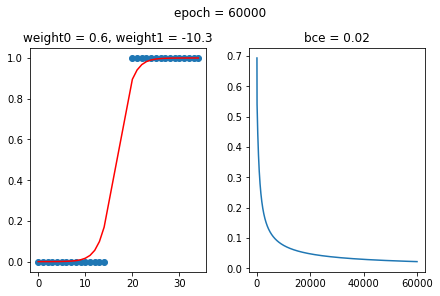

In [6]:
epoch_loss = []

weights = torch.tensor([0., 0.], requires_grad=True)
learning_rate = 1e-2
n = X.shape[0]

for epoch in range(60000+1):
    linear = weights[0]*X + weights[1]
    y_pred = 1/(1+torch.exp(-linear))
    loss = BCE(y, y_pred)
    epoch_loss.append(loss.item())


    if(epoch%5000 == 0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred.detach().numpy(), 'r')
        ax0.set_title('weight0 = {0:.1f}, weight1 = {1:.1f}'.format(weights[0], weights[1]))
        ax1.set_title('bce = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################

    ###autograd in action###
    loss.backward()

    with torch.no_grad():
        weights -= learning_rate * weights.grad
        
    weights.grad.zero_()

Now that we're using PyTorch's autograd capabilities, let's go over the differences in the code. Let's start from the top. You'll see that in the weights tensor, we set requires_grad to true. What does that mean? Remember last chapter, we showed that the slope and the bias are the variables which influence how the sigmoid function fits the points on the graph. The requires_grad parameter of the tensor lets PyTorch know that the values in that tensor are those which need to be changed, so that our logistic regression can give us the optimal BCE.

The second thing you'll see is that the learning rate is a lot bigger and the epochs are a lot lower. That actually works in our favour. When you use PyTorch's built-in functionality (e.g., autograd), the code is optimized and actually runs faster than writing things from scratch.

The third thing you'll see is that we replaced our formulae derived via calculus with the line loss.backward(). That 1 line represents backpropagation. That's super powerful! That 1 line of code tells PyTorch that we're looking for the derivatives of the weights (i.e., slope and bias) with respect to our loss (which in this case is BCE). This functionality of PyTorch is exactly the reason why I chose to not go into the depths of using calculus to derive the formulae in this book.

The next couple of lines is how we update our weights. Since our weights are in 1 tensor, we only need 1 line to update all of our weights.

The last line may seem odd, but we covered it in chapter 1. I'll remind you, in case you forgot. Remember before we got rid of the loops? We were setting the derivatives to 0 before we calculated the derivatives for every point. I referred to it as zero-ing out the gradients. We did it, because we didn't want our values from our previous epoch to be added to the values in the current epoch. In PyTorch, we must explicitly clear out (also known as zero-out) the gradients before we continue to the next epoch.

Congratulations! You ended this chapter, but more importantly, you moved on to PyTorch. It's currently 1 of the top deep learning frameworks used in research and the industry. Awesome work!